In [2]:
import pandas as pd

In [3]:
import ipywidgets as widgets

In [4]:
w = widgets.IntSlider()

In [5]:
from IPython.display import display

In [6]:
display(w)

IntSlider(value=0)

In [7]:
w.value

0

In [8]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'behavior',
 'continuous_update',
 'description',
 'description_allow_html',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'tabbable',
 'tooltip',
 'value']

In [9]:
w.step

1

In [10]:
widgets.IntSlider(step=2)

IntSlider(value=0, step=2)

## Example using interact

Loading a dataset with seaborn and interacting with a widget

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
cars = sns.load_dataset('mpg')

(0.0, 0.03)

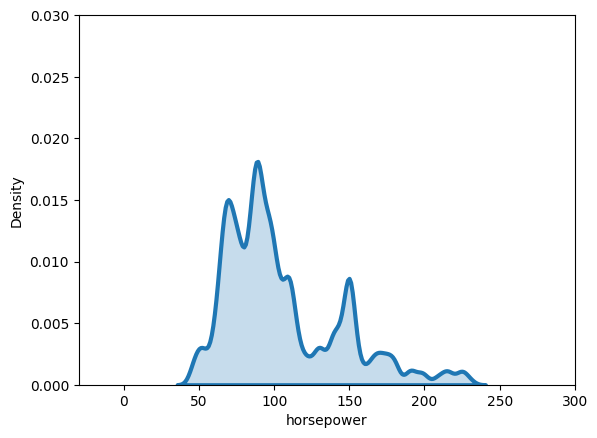

In [13]:
sns.kdeplot(cars.horsepower, lw=3, fill=True,bw_adjust=0.3)
plt.xlim(-30,300)
plt.ylim(0,0.03)

In [14]:
def bandwidth_widget (bw=1):
    sns.kdeplot(cars.horsepower, lw=3, fill=True,bw_adjust=bw)
    plt.xlim(-30,300)
    plt.ylim(0,0.03)

In [15]:
widgets.interact(bandwidth_widget,bw=(0.1,5))

interactive(children=(FloatSlider(value=1.0, description='bw', max=5.0, min=0.1), Output()), _dom_classes=('wi…

<function __main__.bandwidth_widget(bw=1)>

## Explaining Interact

We can import numpy to create series that we also can plot using pyplot afterwards.

In [16]:
import numpy as np

In [17]:
x = np.random.uniform(0,5, size=100)

In [18]:
ep= np.random.normal(size=100)

In [19]:
y = 2*x +ep

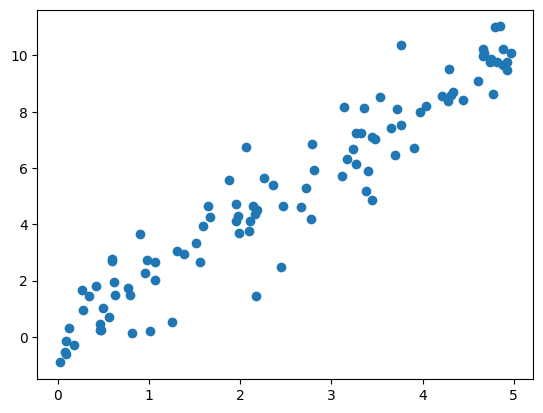

In [20]:
plt.scatter(x,y)

In [21]:
x_values= np.linspace(0,5,1000)

In [22]:
def slope_plot(m=1):
    plt.scatter(x,y)
    plt.plot(x_values,m*x_values,lw=3,color='black')
    plt.ylim(-1.2,12.2)

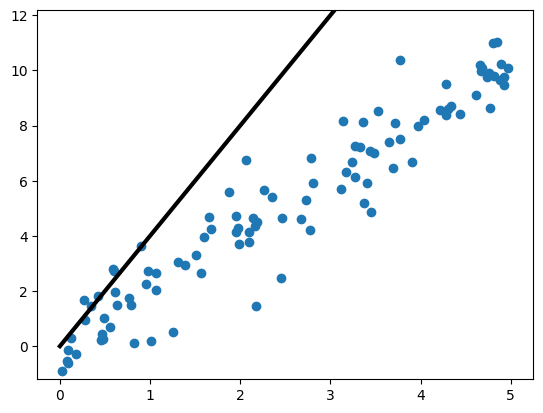

In [23]:
slope_plot(m=4)

In [24]:
widgets.interact(slope_plot,m=(0.2,5,0.2))

interactive(children=(FloatSlider(value=1.0, description='m', max=5.0, min=0.2, step=0.2), Output()), _dom_cla…

<function __main__.slope_plot(m=1)>

In [25]:
jupyter nbextension enable --py widgetsnbextension

SyntaxError: invalid syntax (2269694994.py, line 1)

In [26]:
widgets.interact(slope_plot, m=[0,1,2,3,4])

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Output()), _dom_cl…

<function __main__.slope_plot(m=1)>

In [27]:
def slope_plot_line( m=1, text=""):
    plt.scatter(x,y)
    plt.plot(x_values,m*x_values,lw=3,color='black')
    if text:
        plt.text(0,10,f"Hello {text}")

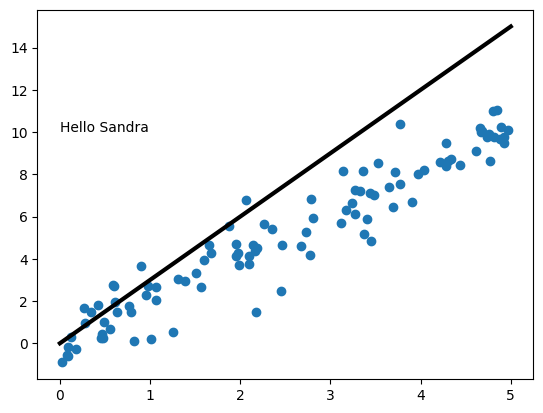

In [28]:
slope_plot_line(m=3, text="Sandra")

In [29]:
widgets.interact(slope_plot_line, m=[0,1,2,3,4],text="Jorge")

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Text(value='Jorge'…

<function __main__.slope_plot_line(m=1, text='')>

In [30]:
plot_with_line = widgets.interactive(slope_plot_line, m=[0,1,2,3,4],text="Sandra",line=True);

In [31]:
display(plot_with_line)

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Text(value='Sandra…